This notebook checks quality of data; applys filtering on cells and then genes; export exploratory statstics results and AnnData with filters

In [1]:
import sys, os
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Inputs

In [5]:
fpath = 'Z:/Data/Analyzed/2022-02-02-Hu-Hela_FUCCI'
rpath = 'Z:/Connie/RIBOmap/result/FUCCI data'
adata = sc.read_h5ad(os.path.join(fpath, 'output/2022-02-21-Hu-FUCCI-raw.h5ad'))
genes = adata.var.index
sample_list = ['RIBOmap', 'STARmap']

# QC

## cells

In [6]:
adata.obs

,orig_index,sample,area,x,y,z,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,Fluo,mKO2
0,0,RIBOmap,168605,29,1143,29,128,4.859812,161.0,5.087596,4472,8553
1,1,RIBOmap,661524,101,1641,29,402,5.998937,868.0,6.767343,103062,817674
2,2,RIBOmap,913746,154,808,30,455,6.122493,1148.0,7.046647,99887,1134346
3,3,RIBOmap,635862,212,7714,30,420,6.042633,1026.0,6.934397,0,0
4,4,RIBOmap,669842,172,4802,31,372,5.921578,842.0,6.736967,124161,1397814
...,...,...,...,...,...,...,...,...,...,...,...,...
3803,1854,STARmap,444670,19790,9321,16,430,6.066108,793.0,6.677083,27368,263631
3804,1855,STARmap,754268,19833,13655,19,519,6.253829,1116.0,7.018402,1161593,403151
3805,1856,STARmap,228801,19848,12437,15,324,5.783825,583.0,6.369901,24316,98074
3806,1857,STARmap,19361,19939,19648,18,6,1.945910,6.0,1.945910,0,0


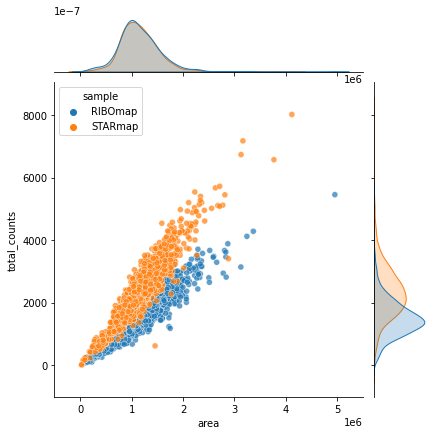

In [7]:
# voluume & total counts
sns.jointplot(data=adata.obs, x='area', y='total_counts', hue='sample', alpha=0.7)
# sns.violinplot(data=adata.obs, x='sample', y='area')
# sns.violinplot(data=adata.obs, x='sample', y='total_counts')

<AxesSubplot:xlabel='sample', ylabel='log1p_n_genes_by_counts'>

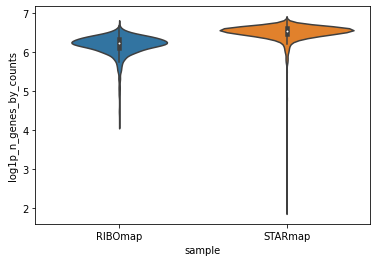

In [8]:
# n_genes in cell
sns.violinplot(data=adata.obs, x='sample', y='log1p_n_genes_by_counts')

In [9]:
adata.obs['density'] = adata.obs['total_counts'] / adata.obs['area']

## genes
added sample specific attributes

In [10]:
# mean counts, n cells by counts, max counts
sample_list = ['RIBOmap', 'STARmap']
for s in sample_list:
    mean_counts = np.mean(adata.X[adata.obs['sample']==s], axis=0)
    max_counts = np.amax(adata.X[adata.obs['sample']==s], axis=0)
    n_cells_by_counts = np.count_nonzero(adata.X[adata.obs['sample']==s], axis=0)
    adata.var['mean_counts_'+s] = mean_counts
    adata.var['max_counts_'+s] = max_counts
    adata.var['n_cells_by_counts_'+s] = n_cells_by_counts
adata.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,max_counts,mean_counts_RIBOmap,max_counts_RIBOmap,n_cells_by_counts_RIBOmap,mean_counts_STARmap,max_counts_STARmap,n_cells_by_counts_STARmap
AARS,2493,1.172531,0.775893,34.532563,4465.0,8.404248,9.0,1.129297,7.0,1248,1.217859,9.0,1245
ASXL1,1969,0.847164,0.613651,48.293067,3226.0,8.079309,7.0,0.469985,4.0,704,1.242604,7.0,1265
COX7B,3208,2.364496,1.213278,15.756303,9004.0,9.105536,14.0,1.808107,10.0,1527,2.947821,14.0,1681
CTGF,2357,1.597952,0.954723,38.103992,6085.0,8.713746,35.0,1.103643,21.0,921,2.116191,35.0,1436
DLX4,673,0.214548,0.194372,82.326681,817.0,6.706862,4.0,0.052335,2.0,97,0.384615,4.0,576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZRANB1,1642,0.619485,0.482108,56.880252,2359.0,7.766417,7.0,0.491534,5.0,722,0.753631,7.0,920
ZSCAN12,695,0.212710,0.192858,81.748950,810.0,6.698268,5.0,0.135454,3.0,239,0.293706,5.0,456
ZSCAN29,1120,0.370010,0.314818,70.588235,1409.0,7.251345,4.0,0.245767,4.0,402,0.500269,4.0,718
ZXDC,2077,0.948792,0.667210,45.456933,3613.0,8.192571,8.0,0.557722,5.0,777,1.358795,8.0,1300


(Text(0.5, 0, 'mean expression'), <matplotlib.legend.Legend at 0x1907aece7d0>)

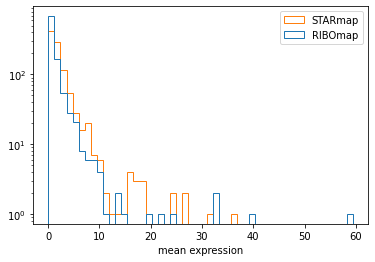

In [11]:
# genes mean expression
plt.hist([adata.var['mean_counts_RIBOmap'], adata.var['mean_counts_STARmap']], bins=50, log=True, label=sample_list, histtype='step', rwidth=1)
plt.xlabel('mean expression'), plt.legend()

(Text(0.5, 0, 'n_cells_by_counts_'),
 <matplotlib.legend.Legend at 0x1907aecf3d0>)

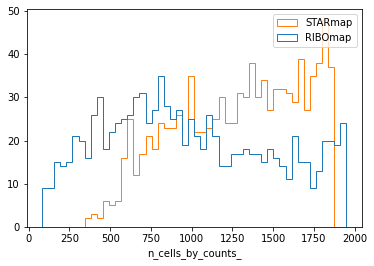

In [12]:
# gene n_cells_by_counts
plt.hist([adata.var['n_cells_by_counts_RIBOmap'], adata.var['n_cells_by_counts_STARmap']], bins=50, label=sample_list, histtype='step')
plt.xlabel('n_cells_by_counts_'), plt.legend()

# Filtering

### filter cells
volume, total_reads, density

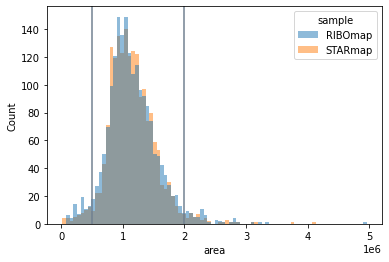

In [13]:
# filter by volume
sns.histplot(data=adata.obs, hue='sample', x='area', linewidth=0)
thres_vol_lower = 0.5e6
thres_vol_higher = 2e6
plt.axvline(x=thres_vol_lower, c='slategrey')
plt.axvline(x=thres_vol_higher, c='slategrey')

pass_vol = [1 if area<thres_vol_higher and area>thres_vol_lower else 0 for area in adata.obs['area']]
adata.obs['pass_volume_filter'] = pass_vol

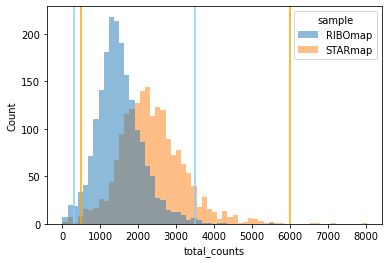

In [14]:
# filter by total_reads
sns.histplot(data=adata.obs, hue='sample', x='total_counts', linewidth=0)
thres_tr_lower_RIBO = 300
thres_tr_higher_RIBO = 3500
plt.axvline(x=thres_tr_lower_RIBO, c='lightskyblue')
plt.axvline(x=thres_tr_higher_RIBO, c='lightskyblue')

thres_tr_lower_STAR = 500
thres_tr_higher_STAR = 6000
plt.axvline(x=thres_tr_lower_STAR, c='orange')
plt.axvline(x=thres_tr_higher_STAR, c='orange')

pass_tr_RIBO = [1 if area<thres_tr_higher_RIBO and area>thres_tr_lower_RIBO else 0 for area in adata.obs[adata.obs['sample']=='RIBOmap']['total_counts']]
pass_tr_STAR = [1 if area<thres_tr_higher_STAR and area>thres_tr_lower_STAR else 0 for area in adata.obs[adata.obs['sample']=='STARmap']['total_counts']]
pass_tr = pass_tr_RIBO + pass_tr_STAR
adata.obs['pass_counts_filter'] = pass_tr

In [15]:
adata.obs['pass_two_filters'] = np.logical_and(adata.obs['pass_volume_filter'], adata.obs['pass_counts_filter'])

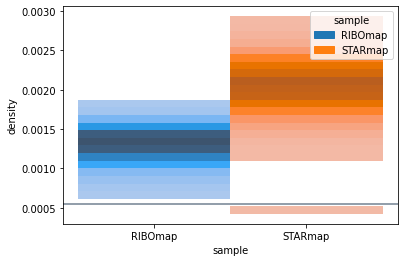

In [16]:
# check density after filtering
sns.histplot(data=adata.obs[adata.obs['pass_two_filters']], x='sample', y='density', hue='sample')
star_dens_thres = 0.00055
plt.axhline(y=star_dens_thres, c='slategray')
pass_dens = [1 if dens > star_dens_thres else 0 for dens in adata.obs['density']]
adata.obs['pass_density_filter'] = pass_dens

In [17]:
adata.obs['pass_all_filters'] = np.logical_and(adata.obs['pass_two_filters'], adata.obs['pass_density_filter'])

In [ ]:
# sns.violinplot(data=adata.obs[adata.obs['pass_all_filters']], x='sample', y='total_counts', legend=False).set_title('after filtering')
# sns.despine()
# plt.savefig(rpath+'/figures/expl_stats/total_counts.pdf')

### filter genes
% cells expressed + max_count

(Text(0.5, 0, 'mean expression (lower end, after cell filtering)'),
 <matplotlib.legend.Legend at 0x1907ae35d20>)

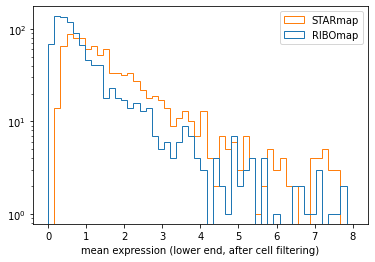

In [18]:
# low abundance genes
plt.hist([np.mean(adata.X[np.logical_and(adata.obs['sample']=='RIBOmap', adata.obs['pass_all_filters'])], axis=0), 
            np.mean(adata.X[np.logical_and(adata.obs['sample']=='STARmap', adata.obs['pass_all_filters'])], axis=0)], 
            range=(0,8), bins=50, log=True, label=sample_list, histtype='step', rwidth=1)
plt.xlabel('mean expression (lower end, after cell filtering)'), plt.legend()

In [19]:
sample_list = ['RIBOmap', 'STARmap']
test_thres_expr = [0.5, 1]
for s in sample_list:
    print(s, ': ')
    X_s = adata.X[np.logical_and(adata.obs['sample']==s, adata.obs['pass_all_filters'])]
    mean_ct = np.mean(X_s, axis=0)  
    for thres in test_thres_expr:
        below = np.count_nonzero(mean_ct<thres)
        print('n_genes mean_counts < {0}: {1}'.format(thres, below))

RIBOmap : 
n_genes mean_counts < 0.5: 356
n_genes mean_counts < 1: 631
STARmap : 
n_genes mean_counts < 0.5: 88
n_genes mean_counts < 1: 340


In [20]:
sample_list = ['RIBOmap', 'STARmap']
pct_cell = [0.1, 0.1]
ct_thres = [2, 4] 
for i, s in enumerate(sample_list):
    X_s = adata.X[np.logical_and(adata.obs['sample']==s, adata.obs['pass_all_filters'])] # filter based on filtered cells
    f1 = np.count_nonzero(X_s, axis=0) > pct_cell[i]*X_s.shape[0]  # filter-1
    f2 = np.amax(X_s, axis=0) > ct_thres[i] # filter-2
    f = np.logical_and(f1, f2)
    print('{0} threshold: expressed in at least {1}%% cells AND max expression in a cell greater than {2}'.format(s, pct_cell[i]*100, ct_thres[i]))
    print('filtered out: {0} genes -- {1: .2f}%'.format(adata.n_vars - np.count_nonzero(f), (adata.n_vars - np.count_nonzero(f))/adata.n_vars))
    adata.var['filter_'+s] = f
adata.var['filter'] = np.logical_and(adata.var['filter_RIBOmap'], adata.var['filter_STARmap'])
print('All together filtered out: {0} genes -- {1: .2f}%'.format(adata.n_vars - np.count_nonzero(adata.var['filter']), (adata.n_vars - np.count_nonzero(adata.var['filter']))/adata.n_vars))

RIBOmap threshold: expressed in at least 10.0%% cells AND max expression in a cell greater than 2
filtered out: 43 genes --  0.04%
STARmap threshold: expressed in at least 10.0%% cells AND max expression in a cell greater than 4
filtered out: 67 genes --  0.07%
All together filtered out: 94 genes --  0.09%


In [21]:
# adata.write_h5ad(rpath+'/adata/FUCCI_cell_&_gene_filter_02-22-22.h5ad')

# After filtering

In [22]:
adata = sc.read_h5ad(rpath+'/adata/FUCCI_cell_&_gene_filter_02-22-22.h5ad')
adata

AnnData object with n_obs × n_vars = 3808 × 991
    obs: 'orig_index', 'sample', 'area', 'x', 'y', 'z', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'Fluo', 'mKO2', 'density', 'pass_volume_filter', 'pass_counts_filter', 'pass_two_filters', 'pass_density_filter', 'pass_all_filters'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'max_counts', 'mean_counts_RIBOmap', 'max_counts_RIBOmap', 'n_cells_by_counts_RIBOmap', 'mean_counts_STARmap', 'max_counts_STARmap', 'n_cells_by_counts_STARmap', 'filter_RIBOmap', 'filter_STARmap', 'filter'
    layers: 'cytoplasm', 'er', 'nucleus', 'outer_cytoplasm'

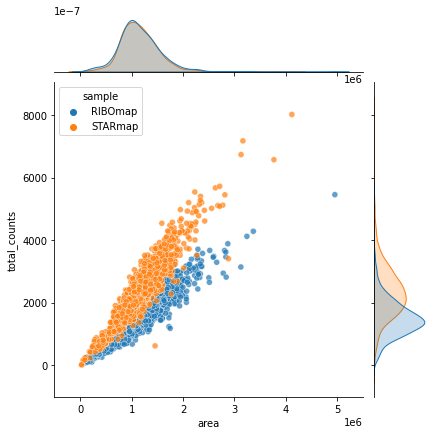

In [23]:
# cell volume, counts
sns.jointplot(data=adata.obs, x='area', y='total_counts', hue='sample', alpha=0.7)

(Text(0.5, 0, 'mean expression'), <matplotlib.legend.Legend at 0x1907b556e60>)

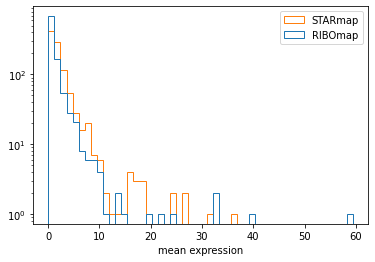

In [29]:
# genes mean expression
plt.hist([adata.var['mean_counts_RIBOmap'], adata.var['mean_counts_STARmap']], bins=50, log=True, label=sample_list, histtype='step', rwidth=1)
plt.xlabel('mean expression'), plt.legend()

(Text(0.5, 0, 'n_cells_by_counts_'),
 <matplotlib.legend.Legend at 0x1900545fa00>)

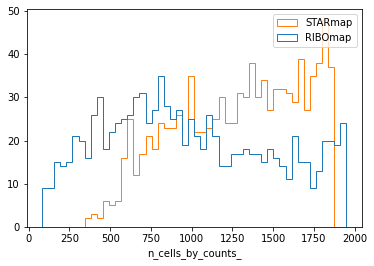

In [30]:
# gene n_cells_by_counts
plt.hist([adata.var['n_cells_by_counts_RIBOmap'], adata.var['n_cells_by_counts_STARmap']], bins=50, label=sample_list, histtype='step')
plt.xlabel('n_cells_by_counts_'), plt.legend()

## coding & non-coding

In [24]:
coding_info = pd.read_excel('Z:/Connie/RIBOmap/gene_modules/TEMPOmap non-coding RNA.xlsx')
coding_genes = coding_info[coding_info['Non-coding RNA']==0]['Gene'].values # 988
non_coding_genes = coding_info[coding_info['Non-coding RNA']==1]['Gene'].values
genes_coding = genes[np.isin(genes, coding_genes)] # 981

In [25]:
adata.var['coding'] = np.isin(genes, coding_genes)
genes_coding_flt = genes[np.logical_and(adata.var['coding'], adata.var['filter'])]

In [26]:
# pct in each cell and then average
adata.obs['coding_genes_total'] = np.sum(adata.X[:,np.isin(genes, coding_genes)], axis=1)
adata.obs['non_coding_genes_total'] = np.sum(adata.X[:,np.isin(genes, non_coding_genes)], axis=1)
adata.obs['pct_coding_genes'] = adata.obs['coding_genes_total'] / adata.obs['total_counts']

Text(0.5, 0.98, 'after cell filtering')

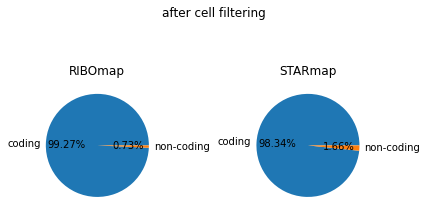

In [27]:
star_coding_flt = np.mean(adata.obs[np.logical_and(adata.obs['sample']=='STARmap', adata.obs['pass_all_filters'])]['coding_genes_total'])
ribo_coding_flt = np.mean(adata.obs[np.logical_and(adata.obs['sample']=='RIBOmap', adata.obs['pass_all_filters'])]['coding_genes_total'])
star_non_coding_flt = np.mean(adata.obs[np.logical_and(adata.obs['sample']=='STARmap', adata.obs['pass_all_filters'])]['non_coding_genes_total'])
ribo_non_coding_flt = np.mean(adata.obs[np.logical_and(adata.obs['sample']=='RIBOmap', adata.obs['pass_all_filters'])]['non_coding_genes_total'])

fig, ax = plt.subplots(1,2)
ax[0].pie([ribo_coding_flt, ribo_non_coding_flt], labels=['coding', 'non-coding'], autopct='%.2f%%')
ax[0].set_title('RIBOmap')
ax[1].pie([star_coding_flt, star_non_coding_flt], labels=['coding', 'non-coding'], autopct='%.2f%%')
ax[1].set_title('STARmap')
plt.tight_layout()
plt.suptitle('after cell filtering')
# plt.savefig(rpath+'/figures/expl_stats/coding_pct.pdf')

In [ ]:
# adata.write_h5ad(rpath+'/adata/FUCCI_cell_&_gene_filter_02-22-22.h5ad')

In [28]:
for sample in sample_list:
    print('{}: {} cells after filtering'.format(sample, len(adata.obs[np.logical_and(adata.obs['sample']==sample, adata.obs['pass_all_filters'])])))
    print('{}: {} average reads per cell'.format(sample, np.mean(adata.obs[np.logical_and(adata.obs['sample']==sample, adata.obs['pass_all_filters'])]['total_counts'])))
    print('{}: {} average genes per cell'.format(sample, np.mean(adata.obs[np.logical_and(adata.obs['sample']==sample, adata.obs['pass_all_filters'])]['n_genes_by_counts'])))

RIBOmap: 1813 cells after filtering
RIBOmap: 1499.9029541015625 average reads per cell
RIBOmap: 504.873138444567 average genes per cell
STARmap: 1757 cells after filtering
STARmap: 2349.26513671875 average reads per cell
STARmap: 691.1132612407513 average genes per cell
